In [57]:
# !pip install lightgbm
# !pip install pydotplus
# !pip install graphviz
# plot_importance( )를 이용하여 feature 중요도 시각화

# !pip install matplotlib

In [58]:
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # 정확도 함수

from xgboost import plot_importance
from xgboost import XGBClassifier

from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix


In [59]:
dataset = pd.read_csv('./data/goms_feature_prep_com_mid.csv') # 각자 경로로 바꾸기
dataset

,jobsearch,yrwish,wishhr,wishsalary,jobgradu,liveexp,schooltype,majorcate,age,intern,toeic,tosp,train,jobseek,cert,midJobCate
0,2,2,0,0,2,1,1,1,23,0,0,0,0,1,0,20
1,1,2,3,2400,2,-1,1,1,21,0,0,0,240,1,0,0
2,2,2,0,0,2,3,1,1,21,0,800,0,0,0,1,9
3,2,2,0,0,2,1,1,1,25,0,0,0,0,0,0,18
4,2,2,0,0,2,1,1,1,21,0,0,0,0,1,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18158,2,2,0,0,1,-1,2,181,27,0,0,0,0,1,0,0
18159,2,2,0,0,2,1,2,181,25,0,0,0,0,0,0,9
18160,2,2,0,0,1,1,2,181,26,0,0,0,0,0,0,23
18161,2,2,2,3000,2,-1,1,20,28,0,0,0,0,0,0,0


In [60]:
y_main = dataset['midJobCate']
x_main = dataset.drop(['midJobCate'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(x_main, y_main, test_size=0.3, random_state=0)

# 디시전트리

In [61]:
# 데이터 표준화 작업
sc = StandardScaler()
sc.fit(X_train)

# 표준화된 데이터셋
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [62]:
dataset_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dataset_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [63]:
from sklearn.metrics import accuracy_score

y_pred_tr = dataset_tree.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tr))

Accuracy: 0.46


In [64]:
import os 
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

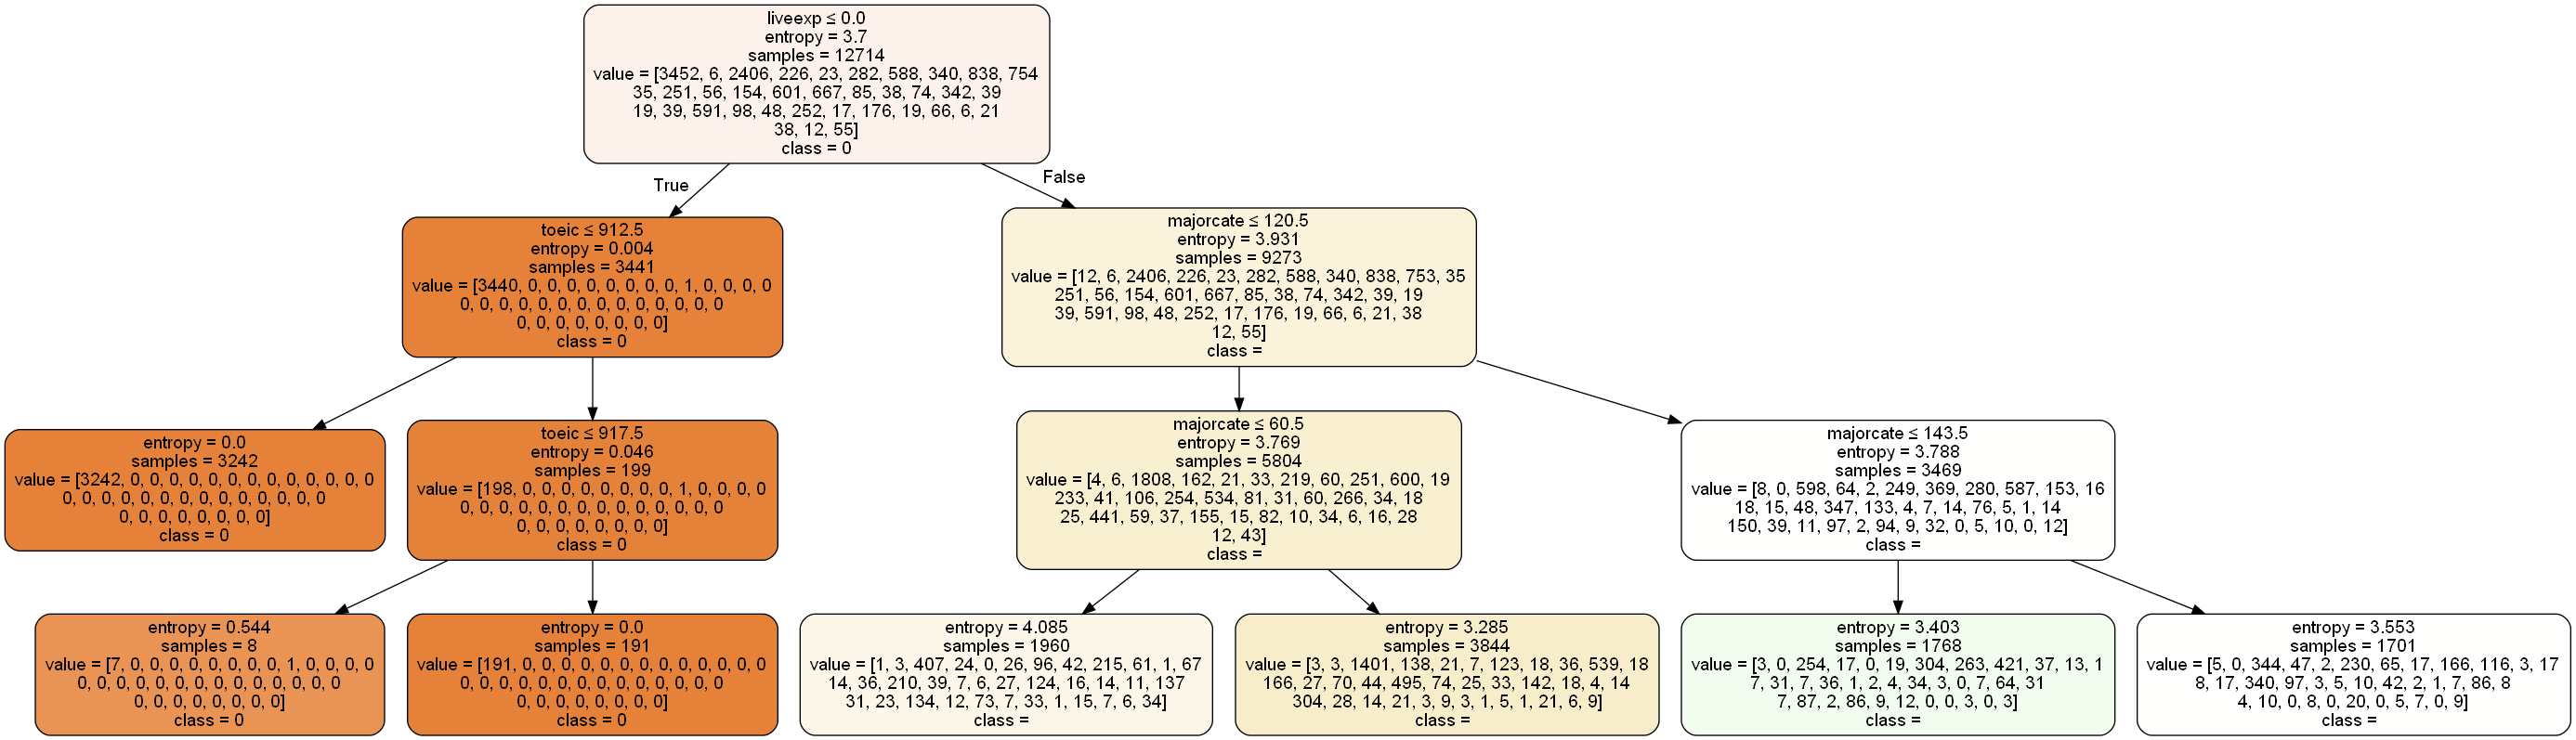

In [65]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image


dot_data = export_graphviz(dataset_tree, out_file=None, feature_names=['jobsearch',	'yrwish',	'wishhr',	'wishsalary',	'jobgradu',	'liveexp',	'schooltype',	'majorcate',	'age',	'intern',	'toeic',	'tosp',	'train',	'jobseek',	'cert'],
                          class_names=str(dataset['midJobCate']), filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# 랜덤포레스트

In [66]:
dataset_forest = RandomForestClassifier(n_estimators=20, max_depth=5,random_state=0)
dataset_forest.fit(X_train,y_train)

y_pred_forest = dataset_forest.predict(X_train)
print('Accuracy: %.2f' % accuracy_score(y_train, y_pred_forest))

Accuracy: 0.49


In [67]:
y_pred_forest = dataset_forest.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_forest))

Accuracy: 0.48


# XGBoost

In [68]:
dataset_xgb = XGBClassifier(n_estimators=500, learning_rate = 0.1, max_depth = 4)
dataset_xgb.fit(X_train, y_train)
xgb_pred = dataset_xgb.predict(X_test)

[17:11:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\python\python36\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [69]:
print('Accuracy: %.2f' % accuracy_score(y_test, xgb_pred))

Accuracy: 0.61


# LightGBM

In [70]:
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals, verbose=True)
y_train_pred = lgbm_wrapper.predict(X_train)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	valid_0's multi_logloss: 2.2159
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 2.0065
[3]	valid_0's multi_logloss: 1.88672
[4]	valid_0's multi_logloss: 1.79647
[5]	valid_0's multi_logloss: 1.72919
[6]	valid_0's multi_logloss: 1.67553
[7]	valid_0's multi_logloss: 1.63266
[8]	valid_0's multi_logloss: 1.59579
[9]	valid_0's multi_logloss: 1.56591
[10]	valid_0's multi_logloss: 1.54377
[11]	valid_0's multi_logloss: 1.52587
[12]	valid_0's multi_logloss: 1.51112
[13]	valid_0's multi_logloss: 1.49791
[14]	valid_0's multi_logloss: 1.48744
[15]	valid_0's multi_logloss: 1.47953
[16]	valid_0's multi_logloss: 1.47218
[17]	valid_0's multi_logloss: 1.46606
[18]	valid_0's multi_logloss: 1.46197
[19]	valid_0's multi_logloss: 1.45812
[20]	valid_0's multi_logloss: 1.45468
[21]	valid_0's multi_logloss: 1.45292
[22]	valid_0's multi_logloss: 1.45107
[23]	valid_0's multi_logloss: 1.45112
[24]	valid_0's multi_logloss: 1.45121
[25]	valid_0's multi_logloss: 1.4507


In [73]:
from sklearn.metrics import accuracy_score
y_test_pred = lgbm_wrapper.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test,y_test_pred))

Accuracy: 0.60


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

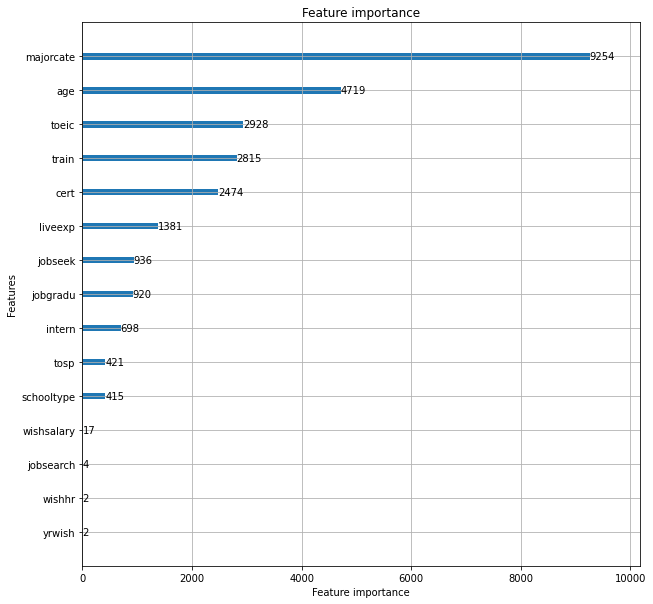

In [72]:
# plot_importance( )를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 10))
plot_importance(lgbm_wrapper, ax=ax)

In [ ]:
df = pd.DataFrame(y_test)

In [ ]:
df['predict'] = lgbm_wrapper.predict(X_test)
df

In [ ]:
df.to_excel('./data/predict.xlsx')

In [ ]:
df = pd.DataFrame(y_test)
df

In [ ]:
get_clf_eval(y_test, preds, pred_proba)